In [1]:
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn import svm
from sklearn.decomposition import PCA
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [2]:
missing_val = '?'
df = pd.read_csv('adult.csv',na_values = missing_val)

In [3]:
df.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,NaN,103497,Some-college,10,Never-married,NaN,Own-child,White,Female,0,0,30,United-States,<=50K


In [4]:
df.tail()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
48837,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
48838,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
48839,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
48840,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K
48841,52,Self-emp-inc,287927,HS-grad,9,Married-civ-spouse,Exec-managerial,Wife,White,Female,15024,0,40,United-States,>50K


In [5]:
df.shape

(48842, 15)

In [6]:
df.isnull().sum()

age                   0
workclass          2799
fnlwgt                0
education             0
educational-num       0
marital-status        0
occupation         2809
relationship          0
race                  0
gender                0
capital-gain          0
capital-loss          0
hours-per-week        0
native-country      857
income                0
dtype: int64

In [7]:
df.dropna(inplace = True)

In [8]:
df.isnull().sum()

age                0
workclass          0
fnlwgt             0
education          0
educational-num    0
marital-status     0
occupation         0
relationship       0
race               0
gender             0
capital-gain       0
capital-loss       0
hours-per-week     0
native-country     0
income             0
dtype: int64

no missing value containg in the dataset.

In [9]:
df.drop('fnlwgt',axis=1,inplace=True)
df.head()

,age,workclass,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
5,34,Private,10th,6,Never-married,Other-service,Not-in-family,White,Male,0,0,30,United-States,<=50K


'fnlwgt' dropped

In [10]:
cat = df.select_dtypes(include=['object'])

In [11]:
cat

,workclass,education,marital-status,occupation,relationship,race,gender,native-country,income
0,Private,11th,Never-married,Machine-op-inspct,Own-child,Black,Male,United-States,<=50K
1,Private,HS-grad,Married-civ-spouse,Farming-fishing,Husband,White,Male,United-States,<=50K
2,Local-gov,Assoc-acdm,Married-civ-spouse,Protective-serv,Husband,White,Male,United-States,>50K
3,Private,Some-college,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,United-States,>50K
5,Private,10th,Never-married,Other-service,Not-in-family,White,Male,United-States,<=50K
...,...,...,...,...,...,...,...,...,...
48837,Private,Assoc-acdm,Married-civ-spouse,Tech-support,Wife,White,Female,United-States,<=50K
48838,Private,HS-grad,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,United-States,>50K
48839,Private,HS-grad,Widowed,Adm-clerical,Unmarried,White,Female,United-States,<=50K
48840,Private,HS-grad,Never-married,Adm-clerical,Own-child,White,Male,United-States,<=50K


In [12]:
encoder = OneHotEncoder(drop='first', sparse=False)
cat_df = pd.DataFrame(encoder.fit_transform(cat), 
                      columns=encoder.get_feature_names(cat.columns))

In [13]:
cat_df

,workclass_Local-gov,workclass_Private,workclass_Self-emp-inc,workclass_Self-emp-not-inc,workclass_State-gov,workclass_Without-pay,education_11th,education_12th,education_1st-4th,education_5th-6th,...,native-country_Puerto-Rico,native-country_Scotland,native-country_South,native-country_Taiwan,native-country_Thailand,native-country_Trinadad&Tobago,native-country_United-States,native-country_Vietnam,native-country_Yugoslavia,income_>50K
0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
3,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
4,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45217,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
45218,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
45219,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
45220,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


In [14]:
num = df.select_dtypes(include=['int64'])

In [15]:
num

,age,educational-num,capital-gain,capital-loss,hours-per-week
0,25,7,0,0,40
1,38,9,0,0,50
2,28,12,0,0,40
3,44,10,7688,0,40
5,34,6,0,0,30
...,...,...,...,...,...
48837,27,12,0,0,38
48838,40,9,0,0,40
48839,58,9,0,0,40
48840,22,9,0,0,20


In [16]:
scaler = StandardScaler()
num_df = pd.DataFrame(scaler.fit_transform(num), 
                      columns = num.columns)

In [17]:
num_df.head()

,age,educational-num,capital-gain,capital-loss,hours-per-week
0,-1.024983,-1.221559,-0.146733,-0.21878,-0.078120
1,-0.041455,-0.438122,-0.146733,-0.21878,0.754701
2,-0.798015,0.737034,-0.146733,-0.21878,-0.078120
3,0.412481,-0.046403,0.877467,-0.21878,-0.078120
4,-0.344079,-1.613277,-0.146733,-0.21878,-0.910942


In [18]:
new_df = pd.concat([num_df, cat_df], axis=1)

In [19]:
new_df

,age,educational-num,capital-gain,capital-loss,hours-per-week,workclass_Local-gov,workclass_Private,workclass_Self-emp-inc,workclass_Self-emp-not-inc,workclass_State-gov,...,native-country_Puerto-Rico,native-country_Scotland,native-country_South,native-country_Taiwan,native-country_Thailand,native-country_Trinadad&Tobago,native-country_United-States,native-country_Vietnam,native-country_Yugoslavia,income_>50K
0,-1.024983,-1.221559,-0.146733,-0.21878,-0.078120,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,-0.041455,-0.438122,-0.146733,-0.21878,0.754701,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,-0.798015,0.737034,-0.146733,-0.21878,-0.078120,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
3,0.412481,-0.046403,0.877467,-0.21878,-0.078120,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
4,-0.344079,-1.613277,-0.146733,-0.21878,-0.910942,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45217,-0.873671,0.737034,-0.146733,-0.21878,-0.244684,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
45218,0.109857,-0.438122,-0.146733,-0.21878,-0.078120,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
45219,1.471665,-0.438122,-0.146733,-0.21878,-0.078120,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
45220,-1.251951,-0.438122,-0.146733,-0.21878,-1.743763,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


In [20]:
# X = new_df.drop('income_>50K',axis=1)
Y = new_df.pop('income_>50K')
X = new_df

In [21]:
X_train,X_test,y_train,y_test = train_test_split(X,Y,test_size=.30,random_state=25)

In [22]:
lr = LogisticRegression()
lr.fit(X_train,y_train)

c:\users\shashank\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [23]:
y_predict = lr.predict(X_test)
y_predict

array([1., 1., 0., ..., 0., 0., 0.])

In [24]:
# Accuracy classification score.
accuracy_score(y_test, y_predict)

0.8499299771504386

In [25]:
confusion_matrix(y_test, y_predict)

array([[9477,  683],
       [1353, 2054]], dtype=int64)

In [26]:
print(classification_report(y_test,y_predict))

              precision    recall  f1-score   support

         0.0       0.88      0.93      0.90     10160
         1.0       0.75      0.60      0.67      3407

    accuracy                           0.85     13567
   macro avg       0.81      0.77      0.79     13567
weighted avg       0.84      0.85      0.84     13567



In [27]:
from sklearn.feature_selection import RFE
lr_temp = LogisticRegression()
## No. of features taking = 30
rfe = RFE(lr_temp, 30)
rfe = rfe.fit(X_train, y_train)
rfe

c:\users\shashank\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
c:\users\shashank\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https:

c:\users\shashank\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
c:\users\shashank\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https:

c:\users\shashank\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
c:\users\shashank\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https:

c:\users\shashank\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
c:\users\shashank\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https:

c:\users\shashank\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
c:\users\shashank\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https:

RFE(estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                 fit_intercept=True, intercept_scaling=1,
                                 l1_ratio=None, max_iter=100,
                                 multi_class='auto', n_jobs=None, penalty='l2',
                                 random_state=None, solver='lbfgs', tol=0.0001,
                                 verbose=0, warm_start=False),
    n_features_to_select=30, step=1, verbose=0)

In [28]:
temp_df = pd.DataFrame({'Columns' : X_train.columns, 'Included' : rfe.support_, 'Ranking' : rfe.ranking_})
temp_df

,Columns,Included,Ranking
0,age,False,18
1,educational-num,True,1
2,capital-gain,True,1
3,capital-loss,False,32
4,hours-per-week,False,19
...,...,...,...
90,native-country_Thailand,False,41
91,native-country_Trinadad&Tobago,False,47
92,native-country_United-States,False,5
93,native-country_Vietnam,True,1


In [29]:
imp_col = X_train.columns[rfe.support_]
imp_col

Index(['educational-num', 'capital-gain', 'workclass_Without-pay',
       'education_1st-4th', 'education_5th-6th', 'education_Prof-school',
       'marital-status_Married-AF-spouse', 'marital-status_Married-civ-spouse',
       'occupation_Exec-managerial', 'occupation_Farming-fishing',
       'occupation_Handlers-cleaners', 'occupation_Other-service',
       'occupation_Priv-house-serv', 'relationship_Other-relative',
       'relationship_Own-child', 'relationship_Wife', 'gender_Male',
       'native-country_Canada', 'native-country_Columbia',
       'native-country_Cuba', 'native-country_Dominican-Republic',
       'native-country_Ireland', 'native-country_Italy', 'native-country_Laos',
       'native-country_Nicaragua', 'native-country_Outlying-US(Guam-USVI-etc)',
       'native-country_Peru', 'native-country_Philippines',
       'native-country_South', 'native-country_Vietnam'],
      dtype='object')

In [30]:
X_train_new = X_train[imp_col]
X_train_new

,educational-num,capital-gain,workclass_Without-pay,education_1st-4th,education_5th-6th,education_Prof-school,marital-status_Married-AF-spouse,marital-status_Married-civ-spouse,occupation_Exec-managerial,occupation_Farming-fishing,...,native-country_Dominican-Republic,native-country_Ireland,native-country_Italy,native-country_Laos,native-country_Nicaragua,native-country_Outlying-US(Guam-USVI-etc),native-country_Peru,native-country_Philippines,native-country_South,native-country_Vietnam
21220,-1.613277,-0.146733,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8492,1.128753,-0.146733,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
22673,-0.046403,-0.146733,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
755,1.128753,0.166868,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
34307,-0.438122,-0.146733,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35702,-0.046403,-0.146733,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
26767,-0.046403,-0.146733,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6618,1.912190,-0.146733,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
24894,1.128753,-0.146733,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [31]:
lrn = LogisticRegression(max_iter=250)
lrn.fit(X_train_new, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=250,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [32]:
y_predict_new = lrn.predict(X_train_new)
y_predict_new

array([0., 1., 0., ..., 0., 1., 0.])

In [33]:
accuracy_score(y_test, y_predict)

0.8499299771504386

In [34]:
pca = PCA()
pca.fit(X)
np.cumsum(pca.explained_variance_ratio_)

array([0.17231214, 0.29928058, 0.41859915, 0.52288518, 0.62121152,
       0.66781356, 0.69754836, 0.72354624, 0.74943991, 0.77017519,
       0.78875128, 0.80669662, 0.8222957 , 0.83642948, 0.84981652,
       0.8613533 , 0.87204272, 0.88250789, 0.89196213, 0.90045472,
       0.9079432 , 0.91518055, 0.92166351, 0.9276611 , 0.93310102,
       0.93814771, 0.94258311, 0.94674013, 0.95079417, 0.95475762,
       0.95861136, 0.96208182, 0.96547486, 0.96881006, 0.9718258 ,
       0.97417841, 0.97648633, 0.97868178, 0.98059593, 0.98226676,
       0.98385806, 0.98536841, 0.98661583, 0.98783116, 0.98894152,
       0.98994237, 0.99067315, 0.99131579, 0.99191365, 0.9924472 ,
       0.99292544, 0.99335723, 0.99375246, 0.99410984, 0.99446161,
       0.99478634, 0.99509617, 0.99538628, 0.99566147, 0.99591763,
       0.99617243, 0.9964134 , 0.99664952, 0.99688091, 0.99710149,
       0.99731476, 0.99752243, 0.99770572, 0.99788872, 0.99805956,
       0.99822186, 0.99837038, 0.99851495, 0.9986505 , 0.99877

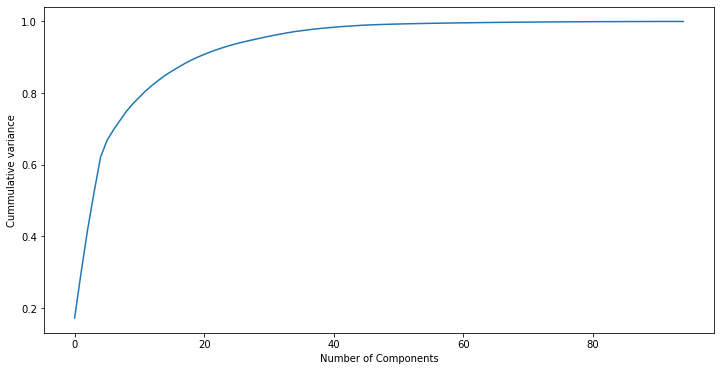

In [35]:
plt.figure(figsize = (12, 6))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of Components')
plt.ylabel('Cummulative variance')
plt.show()

### Observation :-
* Based on the plot above it's clear we should pick 45 features.

In [36]:
## Number of components = 45
pca = PCA(n_components=45)
X_PCA = pca.fit_transform(X)

In [37]:
X_PCA

array([[-1.61176362e+00,  8.43024424e-02,  1.32257923e-01, ...,
        -2.93343872e-02, -1.77468944e-02, -3.67406506e-02],
       [ 1.73045645e-01, -6.38398448e-01,  1.78341469e-01, ...,
         8.01742981e-04, -1.42455516e-03,  2.36057541e-02],
       [ 1.69250217e-01,  7.78385497e-01, -7.04016546e-02, ...,
        -1.05172755e-02,  1.80509540e-02,  4.58021072e-03],
       ...,
       [ 1.76151012e-01, -1.38635020e+00,  3.18449750e-01, ...,
        -6.50772449e-03,  8.21825827e-02, -1.31135671e-02],
       [-2.12269819e+00,  7.15849333e-01,  2.68697215e-02, ...,
        -1.25168173e-02, -4.03085742e-03,  1.06939778e-02],
       [ 1.04287139e+00, -7.57058381e-01,  1.43261506e+00, ...,
         5.97347616e-03,  2.47255028e-03, -2.25358851e-02]])

In [38]:
x_train, x_test, y_train, y_test = train_test_split(X_PCA[:], Y, test_size=.30, random_state=25)

In [39]:
logist = LogisticRegression(max_iter = 250)
logist.fit(x_train,y_train)
##Predicting the test data
y_predict_logistic = logist.predict(x_test)

In [40]:
print('Accuracy score : {}'.format(accuracy_score(y_test,y_predict_logistic)))
print('\n')
print('Confusion metricx :')
print(confusion_matrix(y_test,y_predict_logistic))
print('\n')
print('Classification Report :')
print(classification_report(y_test,y_predict_logistic))

Accuracy score : 0.8504459349893123


Confusion metricx :
[[9497  663]
 [1366 2041]]


Classification Report :
              precision    recall  f1-score   support

         0.0       0.87      0.93      0.90     10160
         1.0       0.75      0.60      0.67      3407

    accuracy                           0.85     13567
   macro avg       0.81      0.77      0.79     13567
weighted avg       0.84      0.85      0.84     13567



In [41]:
svm = svm.SVC()
svm.fit(x_train,y_train)
##Predicting the test data
y_predict_svm = svm.predict(x_test)

In [42]:
print('Accuracy score : {}'.format(accuracy_score(y_test,y_predict_svm)))
print('\n')
print('Confusion metricx :')
print(confusion_matrix(y_test,y_predict_svm))
print('\n')
print('Classification Report :')
print(classification_report(y_test,y_predict_svm))

Accuracy score : 0.8544998894376059


Confusion metricx :
[[9581  579]
 [1395 2012]]


Classification Report :
              precision    recall  f1-score   support

         0.0       0.87      0.94      0.91     10160
         1.0       0.78      0.59      0.67      3407

    accuracy                           0.85     13567
   macro avg       0.82      0.77      0.79     13567
weighted avg       0.85      0.85      0.85     13567



In [43]:
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(x_train,y_train)
##Predicting the test data
y_predict_knn = knn.predict(x_test)

In [44]:
print('Accuracy score : {}'.format(accuracy_score(y_test,y_predict_knn)))
print('\n')
print('Confusion metricx :')
print(confusion_matrix(y_test,y_predict_knn))
print('\n')
print('Classification Report :')
print(classification_report(y_test,y_predict_knn))

Accuracy score : 0.8262696248249429


Confusion metricx :
[[9141 1019]
 [1338 2069]]


Classification Report :
              precision    recall  f1-score   support

         0.0       0.87      0.90      0.89     10160
         1.0       0.67      0.61      0.64      3407

    accuracy                           0.83     13567
   macro avg       0.77      0.75      0.76     13567
weighted avg       0.82      0.83      0.82     13567



In [45]:
dtc = DecisionTreeClassifier()
dtc.fit(x_train,y_train)
##Predicting the test data
y_predict_dtc = dtc.predict(x_test)

In [46]:
print('Accuracy score : {}'.format(accuracy_score(y_test,y_predict_dtc)))
print('\n')
print('Confusion metricx :')
print(confusion_matrix(y_test,y_predict_dtc))
print('\n')
print('Classification Report :')
print(classification_report(y_test,y_predict_dtc))

Accuracy score : 0.8034200633891059


Confusion metricx :
[[8903 1257]
 [1410 1997]]


Classification Report :
              precision    recall  f1-score   support

         0.0       0.86      0.88      0.87     10160
         1.0       0.61      0.59      0.60      3407

    accuracy                           0.80     13567
   macro avg       0.74      0.73      0.73     13567
weighted avg       0.80      0.80      0.80     13567

